## Support Vector Machines Implementation on Iris Dataset

In [5]:
# Library imports

import pandas as pd
import seaborn as sns
%matplotlib inline

### Load the data and validate

In [6]:
from sklearn import datasets

iris = datasets.load_iris()

# This is a dictionary, to view the keys and description
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [7]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

### Exploratory Analysis

In [8]:
# Lets us create a dataframe from this dictionary

df_features = pd.DataFrame(iris['data'], columns=iris['feature_names'])
df_target = pd.DataFrame(iris['target'], columns=['Species'])
df_target.replace({'Species': {0: 'setosa', 1: 'versicolor', 2: 'virginica'}}, inplace=True)
df = pd.concat([df_features, df_target], axis=1)
# Check initial rows
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


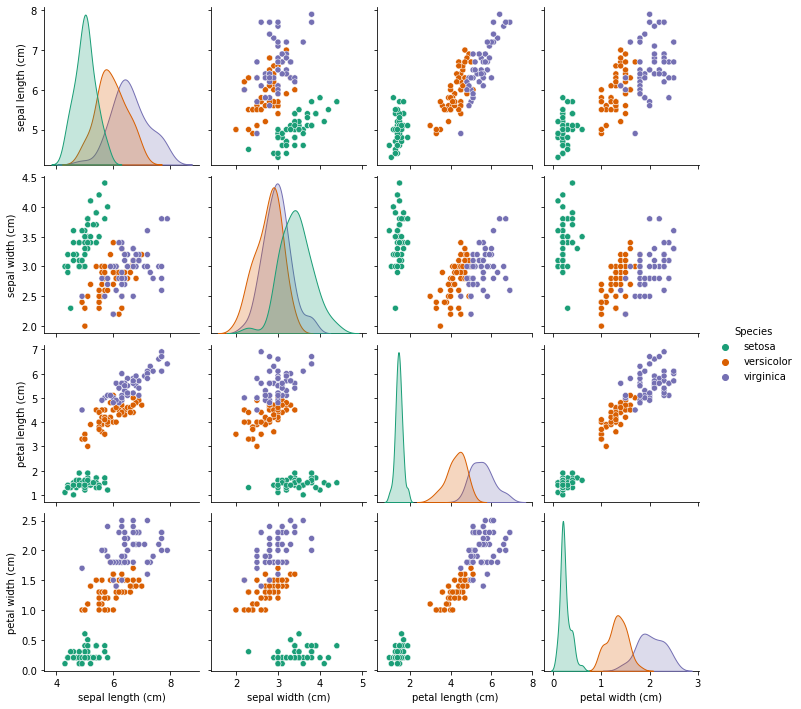

In [10]:
# We will create a pairplot with hue as species
sns.pairplot(df, hue='Species', palette='Dark2');

Setosa is the most separable class

### Train, Test Split

In [11]:
from sklearn.model_selection import train_test_split

features = df.drop('Species', axis=1)
target = df['Species']

features_train, features_test, target_train, target_test = train_test_split(features, target, 
                                                                           test_size=0.3, random_state=101)

### Train the Model

In [12]:
from sklearn.svm import SVC

model = SVC(gamma='auto')
model.fit(features_train, target_train)

SVC(gamma='auto')

### Model Evaluation

In [13]:
predictions = model.predict(features_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(target_test, predictions))

[[13  0  0]
 [ 0 20  0]
 [ 0  0 12]]


In [14]:
print(classification_report(target_test, predictions))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      1.00      1.00        20
   virginica       1.00      1.00      1.00        12

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

